 **Ensamble básico de clasificadores**

In [57]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import learning_curve
import graphviz
from sklearn.tree import export_graphviz
import os
import seaborn as sns; sns.set()
#os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

%matplotlib inline
import random
import decimal
import seaborn as sb

**Creación del en encabezado**

In [58]:
archivo=input("Ingresa el nombre del archivo(conjunto de datos)")
file=open(archivo,"r")
nElementos=int(file.readline())
nAtributos=int(file.readline())
nClases=int(file.readline())
columns=[]
atributos=[]
print(nAtributos)
type(nAtributos)
for i in range (1,nAtributos+1):
    columns.append("x"+str(i))
    atributos.append("x"+str(i))
columns.append("Clases")

Ingresa el nombre del archivo(conjunto de datos) Slice409.txt


385


**Lectura del archivo**

In [59]:
cd=pd.read_csv(archivo,skiprows=lambda x: x<3,names=columns)
cd.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x377,x378,x379,x380,x381,x382,x383,x384,x385,Clases
0,0.622490,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,-0.25,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.00,0.00,27.937052,4
1,0.630137,0.400524,0.421793,0.850483,0.734300,0.000000,0.0,-0.25,-0.25,-0.25,...,0.0,0.97244,0.995384,0.997934,0.0,0.0,-0.25,-0.25,11.468284,4
2,0.657718,0.773077,0.850657,0.753205,0.000000,0.000000,0.0,-0.25,-0.25,-0.25,...,0.0,0.95305,0.986386,0.993740,0.0,0.0,-0.25,-0.25,13.492684,4
3,0.683544,0.573705,0.323887,0.824176,0.728665,0.000000,0.0,-0.25,-0.25,-0.25,...,0.0,0.00000,0.995114,0.997632,0.0,0.0,-0.25,-0.25,11.413571,4
4,0.000000,0.000000,0.000000,0.000000,0.196364,0.947141,0.0,-0.25,-0.25,-0.25,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,-0.25,-0.25,9.939380,5


**Escalando los datos**

In [60]:
x=cd.loc[:,atributos].values
y=cd.loc[:,'Clases'].values
x=StandardScaler().fit_transform(x)
pd.DataFrame(data=x,columns=atributos).head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x376,x377,x378,x379,x380,x381,x382,x383,x384,x385
0,1.992098,-0.328935,-0.261308,-0.323317,-0.482472,-0.626457,-0.241522,-0.047155,0.121493,-0.201773,...,0.777124,-0.442261,-0.587134,-0.678336,-0.692425,-0.470336,0.115844,0.877817,1.570383,0.443470
1,2.022537,1.508664,1.812606,2.978071,1.832712,-0.626457,-0.241522,-0.733230,-0.646223,-0.201773,...,0.777124,-0.442261,1.661434,1.477574,1.464809,-0.470336,0.115844,-1.139190,-0.636787,-1.533037
2,2.132325,3.217932,3.921288,2.600459,-0.482472,-0.626457,-0.241522,-0.733230,-0.646223,-0.201773,...,-1.286796,-0.442261,1.616599,1.458085,1.455743,-0.470336,0.115844,-1.139190,-0.636787,-1.290078
3,2.235128,2.303216,1.331212,2.875953,1.814946,-0.626457,-0.241522,-0.733230,-0.646223,-0.201773,...,0.777124,-0.442261,-0.587134,1.476989,1.464156,-0.470336,0.115844,-1.139190,-0.636787,-1.539604
4,-0.485770,-0.328935,-0.261308,-0.323317,0.136647,1.980025,-0.241522,-0.733230,-0.646223,-0.201773,...,-1.286796,-0.442261,-0.587134,-0.678336,-0.692425,-0.470336,0.115844,-1.139190,-0.636787,-1.716529


In [61]:
dimensiones=int(input("Ingresa los numeros de dimensiones a considerar"))
dimTargets=[]
for i in range (1,dimensiones+1):
    dimTargets.append('Componente principal '+str(i))
pca = PCA(n_components=dimensiones)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = dimTargets)
finalDf = pd.concat([principalDf, cd[['Clases']]], axis = 1)
finalDf.head(5)

Ingresa los numeros de dimensiones a considerar 100


,Componente principal 1,Componente principal 2,Componente principal 3,Componente principal 4,Componente principal 5,Componente principal 6,Componente principal 7,Componente principal 8,Componente principal 9,Componente principal 10,...,Componente principal 92,Componente principal 93,Componente principal 94,Componente principal 95,Componente principal 96,Componente principal 97,Componente principal 98,Componente principal 99,Componente principal 100,Clases
0,-3.826570,9.149169,-1.190068,2.448656,1.644291,0.695479,-5.907816,-1.720241,-2.353352,-5.577808,...,-0.005091,-0.031513,-0.415580,0.035408,-0.300680,0.111677,-0.393182,0.472158,0.030163,4
1,5.867545,-3.935892,10.392853,-2.473608,-0.930599,-0.123095,-0.886344,-0.607607,-2.199819,-0.574160,...,-0.153850,0.032984,0.330078,0.198833,-0.069235,0.000849,0.184322,-0.534154,-0.043069,4
2,5.794284,-5.288344,18.520935,8.759280,-5.519943,0.313808,5.913456,-0.597909,-2.203420,-4.262606,...,-0.248674,0.268901,0.126916,0.019143,0.186703,0.377123,-0.104422,-0.038715,-0.124543,4
3,6.132414,-3.602010,10.365129,-2.657608,-0.675770,-0.125861,-0.677840,-0.572945,-1.904100,-0.384511,...,-0.218437,-0.501709,-0.156505,0.291500,-0.076118,0.115782,0.349840,-0.376226,-0.367387,4
4,9.157489,-1.806634,5.848044,-11.535259,1.977649,-1.330192,-1.584185,-1.422252,0.115894,1.187564,...,-0.028214,-0.220126,0.003617,0.107922,0.033552,0.083366,-0.098068,0.028170,-0.009851,5


**Si es posible se crea la gráfica de los componente principales si se obtienen 2 dimensioens**

In [62]:
targets = [0,1,2,3,4,5,6]
if dimensiones==2:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Componente principal 1', fontsize = 15)
    ax.set_ylabel('Componente principal 2', fontsize = 15)
    ax.set_title('PCA 2 Componentes', fontsize = 20)


    
    colors = ['green','grey','blue','red','brown','pink','yellow']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Clases'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Componente principal 1']
                   , finalDf.loc[indicesToKeep, 'Componente principal 2']

                   , s = 20)
    ax.legend(targets)
    ax.grid()

**Naive Bayes**

[]


Ingresa el número de pliegues a considerar 10



Porcentaje de exactitud 88.73 %
Error 0.11246943765281174
Total de Muestras en Test: 409
Fallos: 46
Matriz de confusión:
 [[ 49   2   0   0   0   0]
 [ 12 174   3   0   3   6]
 [  0   2  17   0   2   0]
 [  0   0   0  21   1   0]
 [  4   4   0   0  34   0]
 [  6   1   0   0   0  68]]


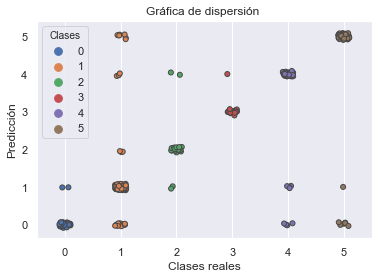

In [63]:
import seaborn as sb
X = principalComponents
accuracy=[]
print(accuracy)
pliegues=int(input("Ingresa el número de pliegues a considerar"))
clasificadorNB = GaussianNB()
predict1=cross_val_predict(clasificadorNB,X,y,cv=pliegues)
scores = cross_validate(clasificadorNB, X, y, cv=pliegues,
                        scoring=('accuracy'),
                        return_train_score=True)
accuracy.append(np.mean(scores['test_score'])*100)
print("\nPorcentaje de exactitud {0:.2f} %".format(np.mean(scores['test_score'])*100))
print("Error {}".format(((y != predict1).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict1).sum()
))

matriz=confusion_matrix(y,predict1)
print("Matriz de confusión:\n",matriz)
#sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
#            xticklabels=targets, yticklabels=targets)
#plt.xlabel('Clases reales')
#plt.ylabel('Predicción');
#Gráfica de dispersión
import random
import decimal
predicciones=[]
for i in predict1:
    j=random.triangular(-.1,.1)
    j=round(j,3)
    predicciones.append(i+j)

real = pd.DataFrame(data=y,columns =['Clases reales'])
clases = pd.DataFrame(data=y,columns =['Clases'])
predecidas = pd.DataFrame(data=predicciones,columns=['Predicción'])
finalDf = pd.concat([real,predecidas,clases], axis = 1)
plt.title('Gráfica de dispersión ')
grafico=sb.stripplot(x = "Clases reales", y = "Predicción", hue="Clases",data = finalDf,jitter=.1,linewidth=1)
grafico.grid()
#Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator=clasificadorNB,
                        X=X, y=y, 
                        cv=pliegues)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



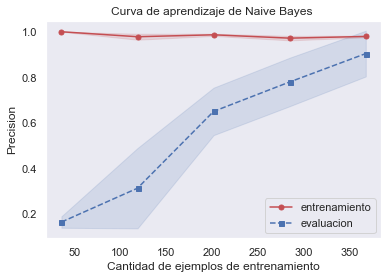

In [50]:
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje de Naive Bayes ')
plt.legend(loc='lower right')
plt.xlabel('Cantidad de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

**Árbol de decisión**

Ingresa la maxima profundidad del árbol 10



Porcentaje de exactitud 89.93 %
Error 0.07334963325183375
Total de Muestras en Test: 409
Fallos: 30
Matriz de confusión:
 [[ 50   0   1   0   0   0]
 [  0 190   5   2   1   0]
 [  0   0  19   0   2   0]
 [  0   1   0  19   0   2]
 [  3   0   1   0  34   4]
 [  0   4   0   4   0  67]]


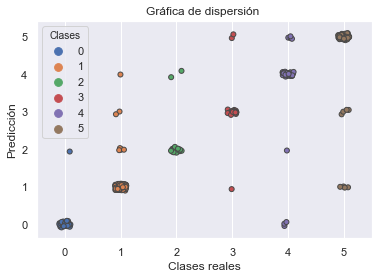

In [64]:
deep=int(input("Ingresa la maxima profundidad del árbol"))
arbol=DecisionTreeClassifier(criterion='entropy', max_depth=deep)
predict2=cross_val_predict(arbol,x,y,cv=pliegues)
scores = cross_validate(arbol, x, y, cv=pliegues,
                        scoring=('accuracy'),
                        return_train_score=True,return_estimator=True)
accuracy.append(np.mean(scores['test_score'])*100)
print("\nPorcentaje de exactitud {0:.2f} %".format(np.mean(scores['test_score'])*100))
print("Error {}".format(((y != predict2).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict2).sum()
))

matriz=confusion_matrix(y,predict2)
print("Matriz de confusión:\n",matriz)
#sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
#            xticklabels=targets, yticklabels=targets)
#plt.xlabel('Clases reales')
#plt.ylabel('Predicción');
#Gráfica de dispersión
import random
import decimal
predicciones=[]
for i in predict2:
    j=random.triangular(-.1,.1)
    j=round(j,3)
    predicciones.append(i+j)

real = pd.DataFrame(data=y,columns =['Clases reales'])
clases = pd.DataFrame(data=y,columns =['Clases'])
predecidas = pd.DataFrame(data=predicciones,columns=['Predicción'])
finalDf = pd.concat([real,predecidas,clases], axis = 1)
plt.title('Gráfica de dispersión ')
grafico=sb.stripplot(x = "Clases reales", y = "Predicción", hue="Clases",data = finalDf,jitter=.1,linewidth=1)
grafico.grid()
#Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator=arbol,
                        X=x, y=y, 
                        cv=pliegues)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

**Curva de aprendizaje y el árbol de decisición**

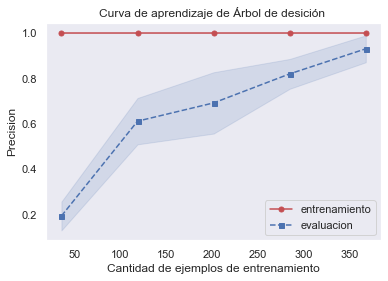

In [52]:
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje de Árbol de desición ')
plt.legend(loc='lower right')
plt.xlabel('Cantidad de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

kf = KFold(n_splits=10) # Define the split - into 2 folds  # returns the number of splitting iterations in the cross-validator
scor=[]
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    arbol.fit(X_train,y_train)
    scor.append(arbol.score(X_train,y_train))
#export_graphviz(arbol, out_file='arbol.dot', class_names=targets,
#               feature_names=atributos, impurity=False, filled=True)
#with open('arbol.dot') as f:
#    dot_graph=f.read()
#graphviz.Source(dot_graph)

**K-vecinos más cercanos**

Ingresa los K vecinos para usar 5


5

Porcentaje de exactitud 96.08 %
Error 0.039119804400977995
Total de Muestras en Test: 409
Fallos: 16
Matriz de confusión:
 [[ 48   1   0   0   0   2]
 [  3 195   0   0   0   0]
 [  4   2  14   0   1   0]
 [  0   0   0  22   0   0]
 [  1   0   0   0  40   1]
 [  0   0   0   0   1  74]]


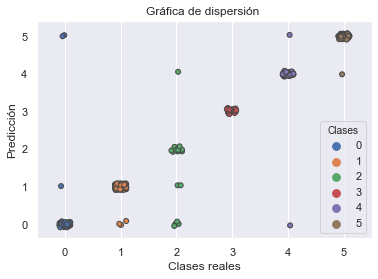

In [53]:
from sklearn.neighbors import KNeighborsClassifier
k=int(input("Ingresa los K vecinos para usar"))
print(k)
knn = KNeighborsClassifier(n_neighbors=k)
predict3=cross_val_predict(knn,X,y,cv=pliegues)
scores = cross_validate(knn, X, y, cv=pliegues,
                        scoring=('accuracy'),
                        return_train_score=True)
accuracy.append(np.mean(scores['test_score'])*100)
print("\nPorcentaje de exactitud {0:.2f} %".format(np.mean(scores['test_score'])*100))
print("Error {}".format(((y != predict3).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict3).sum()
))

matriz=confusion_matrix(y,predict3)
print("Matriz de confusión:\n",matriz)
#sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
#            xticklabels=targets, yticklabels=targets)
#plt.xlabel('Clases reales')
#plt.ylabel('Predicción');
#Gráfica de dispersión
import random
import decimal
predicciones=[]
for i in predict3:
    j=random.triangular(-.1,.1)
    j=round(j,3)
    predicciones.append(i+j)

real = pd.DataFrame(data=y,columns =['Clases reales'])
clases = pd.DataFrame(data=y,columns =['Clases'])
predecidas = pd.DataFrame(data=predicciones,columns=['Predicción'])
finalDf = pd.concat([real,predecidas,clases], axis = 1)
plt.title('Gráfica de dispersión ')
grafico=sb.stripplot(x = "Clases reales", y = "Predicción", hue="Clases",data = finalDf,jitter=.1,linewidth=1)
grafico.grid()
#Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator=knn,
                        X=X, y=y, 
                        cv=pliegues)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

**Curva de aprendizaje de K-vecinos más cercanos**

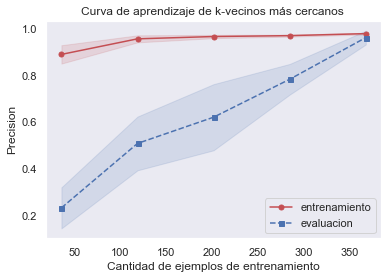

In [54]:
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje de k-vecinos más cercanos ')
plt.legend(loc='lower right')
plt.xlabel('Cantidad de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

**ENSAMBLE DE CLASIFICADORES**


Porcentaje de exactitud del ENSAMBLE 96.82 %
Error 0.03178484107579462
Total de Muestras en Test: 409
Fallos: 13

Porcentaje de exactitud de NAIVE BAYES 90.41 %
Error 0.09535452322738386
Total de Muestras en Test: 409
Fallos: 39

Porcentaje de exactitud del ÁRBOL DE DECISIÓN 93.65 %
Error 0.07823960880195599
Total de Muestras en Test: 409
Fallos: 32

Porcentaje de exactitud del K-VECINOS MÁS CERCANOS 96.08 %
Error 0.039119804400977995
Total de Muestras en Test: 409
Fallos: 16

Matriz de confusión del ENSAMBLE:
 [[ 49   1   0   0   0   1]
 [  0 197   0   0   0   1]
 [  2   2  15   0   2   0]
 [  0   0   0  21   0   1]
 [  1   0   0   0  40   1]
 [  0   0   0   0   1  74]]


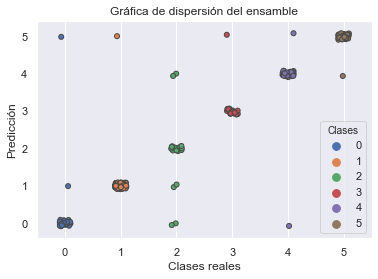

In [55]:
from sklearn.metrics import accuracy_score

prediccionE=[]
for p1,p2,p3 in zip(predict1,predict2,predict3):
  #  print(p1," ",p2," ",p3)
    if p1==p2:
        prediccionE.append(p1)
    elif p1==p3:
        prediccionE.append(p3)
    elif p2==p3:
        prediccionE.append(p2)
    else: 
        azar = random.randint(1,3)
        if azar==1:
            prediccionE.append(p1)
        if azar==2:
            prediccionE.append(p2)
        if azar==3:
            prediccionE.append(p3)
exactitud = accuracy_score(y,prediccionE)
accuracy.append(np.mean(scores['test_score'])*100)
print("\nPorcentaje de exactitud del ENSAMBLE {0:.2f} %".format(exactitud*100))
print("Error {}".format(((y != prediccionE).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != prediccionE).sum()
))
print("\nPorcentaje de exactitud de NAIVE BAYES {0:.2f} %".format(accuracy[0]))
print("Error {}".format(((y != predict1).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict1).sum()
))
print("\nPorcentaje de exactitud del ÁRBOL DE DECISIÓN {0:.2f} %".format(accuracy[1]))
print("Error {}".format(((y != predict2).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict2).sum()
))
print("\nPorcentaje de exactitud del K-VECINOS MÁS CERCANOS {0:.2f} %".format(accuracy[3]))
print("Error {}".format(((y != predict3).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict3).sum()
))
matriz=confusion_matrix(y,prediccionE)
print("\nMatriz de confusión del ENSAMBLE:\n",matriz)
      
import random
import decimal
predicciones=[]
for i in prediccionE:
    j=random.triangular(-.1,.1)
    j=round(j,3)
    predicciones.append(i+j)

real = pd.DataFrame(data=y,columns =['Clases reales'])
clases = pd.DataFrame(data=y,columns =['Clases'])
predecidas = pd.DataFrame(data=predicciones,columns=['Predicción'])
finalDf = pd.concat([real,predecidas,clases], axis = 1)
plt.title('Gráfica de dispersión del ensamble')
grafico=sb.stripplot(x = "Clases reales", y = "Predicción", hue="Clases",data = finalDf,jitter=.1,linewidth=1)
grafico.grid()



**EXPERIMENTO CON VOTINGCLASIFIER**\n
ÚNICAMENTE SE AÑADIO PARA EXPERIMENTAR Y COMPARAR RESULTADOS


Porcentaje de exactitud 95.08 %
Error 0.03178484107579462
Total de Muestras en Test: 409
Fallos: 13
Matriz de confusión:
 [[ 49   1   0   0   0   1]
 [  1 197   0   0   0   0]
 [  3   2  15   0   1   0]
 [  0   0   0  22   0   0]
 [  1   1   0   0  39   1]
 [  0   0   0   0   1  74]]


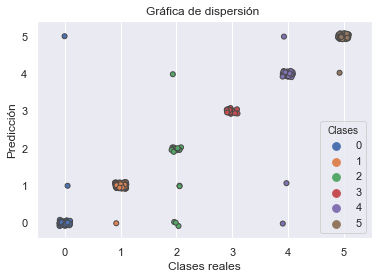

In [56]:
from sklearn.ensemble import  VotingClassifier
from sklearn.metrics import accuracy_score
eclf1 = VotingClassifier(estimators=[
        ('NB', clasificadorNB), ('a', arbol), ('knn', knn)], voting='hard')
scores = cross_validate(eclf1, X, y, cv=pliegues,
                        scoring=('accuracy'),
                        return_train_score=True)
predict=cross_val_predict(eclf1,X,y,cv=pliegues)

print("\nPorcentaje de exactitud {0:.2f} %".format(np.mean(scores['test_score'])*100))
print("Error {}".format(((y != predict).sum())/nElementos))
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          nElementos,
          (y != predict).sum()
))

matriz=confusion_matrix(y,predict)
print("Matriz de confusión:\n",matriz)
#sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
#            xticklabels=targets, yticklabels=targets)
#plt.xlabel('Clases reales')
#plt.ylabel('Predicción');
#Gráfica de dispersión
import random
import decimal
predicciones=[]
for i in predict:
    j=random.triangular(-.1,.1)
    j=round(j,3)
    predicciones.append(i+j)

real = pd.DataFrame(data=y,columns =['Clases reales'])
clases = pd.DataFrame(data=y,columns =['Clases'])
predecidas = pd.DataFrame(data=predicciones,columns=['Predicción'])
finalDf = pd.concat([real,predecidas,clases], axis = 1)
plt.title('Gráfica de dispersión ')
grafico=sb.stripplot(x = "Clases reales", y = "Predicción", hue="Clases",data = finalDf,jitter=.1,linewidth=1)
grafico.grid()